[1] "b3um_5kHz_600mA_0V_5.txt"

,V1,V2,V3
1,0.00000,54.04772,38.05662
2,1.00000,54.05713,38.03897
3,2.00000,54.06563,38.07286
4,3.00000,54.10361,38.12439
5,4.00000,54.03136,38.08684
6,5.00000,54.02371,38.00216
7,6.00000,54.00591,37.98118
8,7.00000,54.05151,38.01932
9,8.00000,54.02866,38.07418
10,9.00000,54.01882,38.09489


[1] 70000

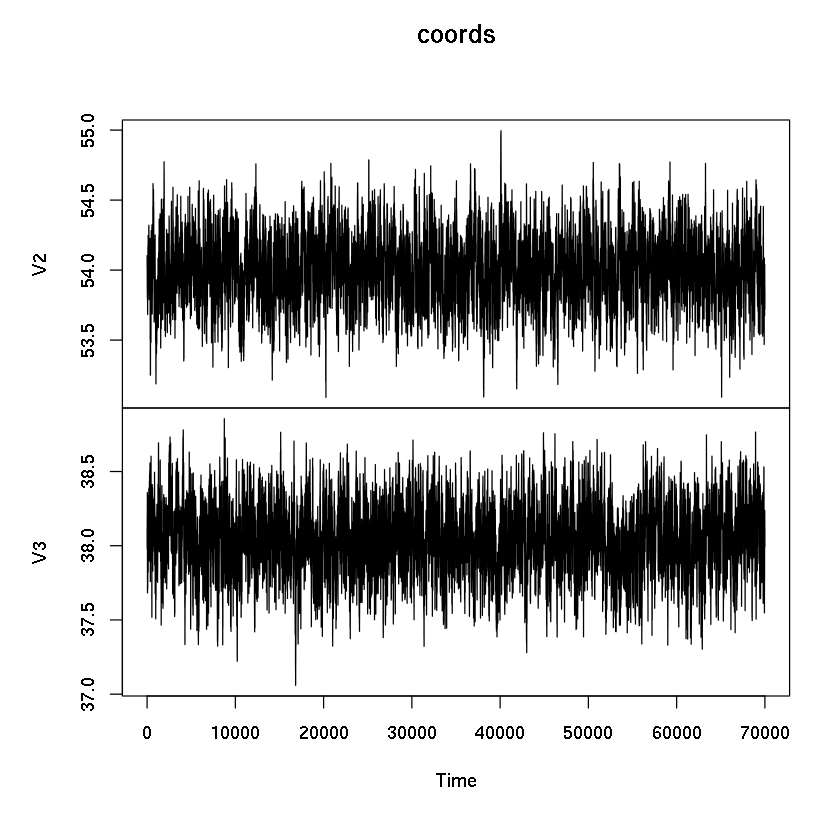

In [27]:
ddir = '../opt tweez data/06_03_2014/'

files = list.files(ddir)
fn = 5 #length(files)
files[fn]

coords = read.table(paste(ddir,files[fn],sep=''),sep =';',dec = ',')
coords[1:10,]
length(coords[,1])
coords = ts(coords[,2:3]) # line numbers, etc. present
plot(coords)

In [28]:
eig = eigen(cov(coords))
eig$values
eig$vectors

[1] 0.05429409 0.04985057

-0.99835581,-0.05732075
0.05732075,-0.99835581


-0.23262780,-0.01279814
0.01335636,-0.22290530


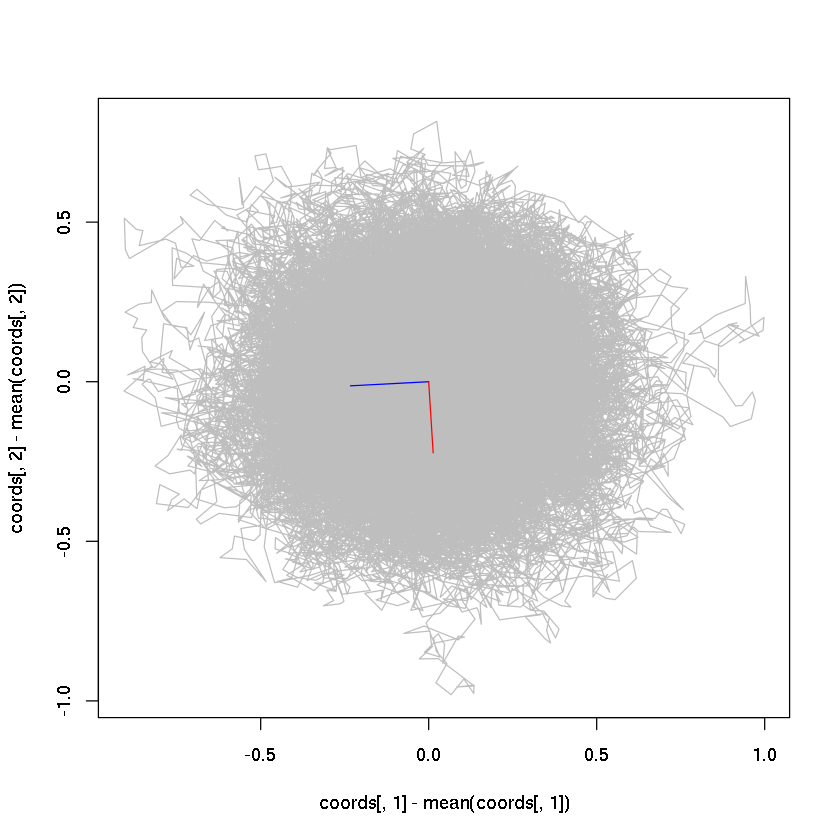

In [29]:
m_axes = rbind(sqrt(eig$values),sqrt(eig$values)) * eig$vectors
m_axes 
plot(coords[,1]-mean(coords[,1]),coords[,2]-mean(coords[,2]),type='l',col='grey')
lines(c(0,m_axes[1,1]), c(0,m_axes[1,2]),type='l',col='blue')
lines(c(0,m_axes[2,1]), c(0,m_axes[2,2]),type='l',col='red')

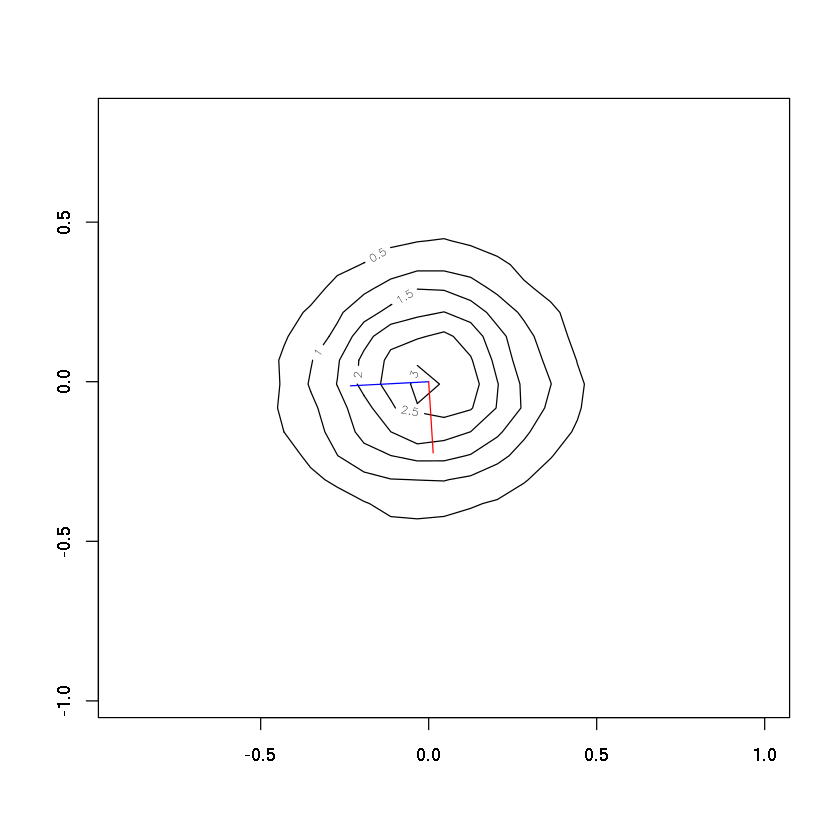

In [30]:
library('MASS')
contour(kde2d(coords[,1]-mean(coords[,1]),coords[,2]-mean(coords[,2])))
lines(c(0,m_axes[1,1]), c(0,m_axes[1,2]),type='l',col='blue')
lines(c(0,m_axes[2,1]), c(0,m_axes[2,2]),type='l',col='red')

In [31]:
theta = atan2(m_axes[1,2], m_axes[1,1])
theta

[1] -3.086633

In [32]:
diffs = diff(coords)

In [33]:
deig = eigen(cov(diffs))
deig$values
deig$vectors

[1] 0.002536724 0.002301503

-0.9114727,-0.4113606
0.4113606,-0.9114727


-0.04590714,-0.01973461
0.02071855,-0.04372697


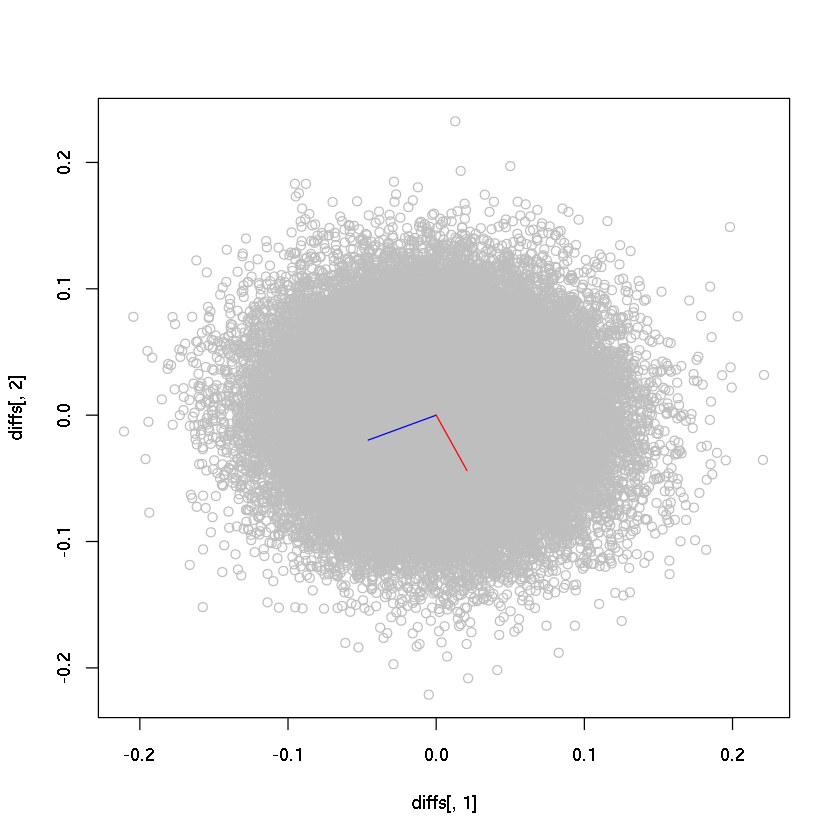

In [34]:
dm_axes = rbind(sqrt(deig$values),sqrt(deig$values)) * deig$vectors
dm_axes
plot(diffs[,1],diffs[,2],type='p',col='grey')
lines(c(0,dm_axes[1,1]), c(0,dm_axes[1,2]),type='l',col='blue')
lines(c(0,dm_axes[2,1]), c(0,dm_axes[2,2]),type='l',col='red')

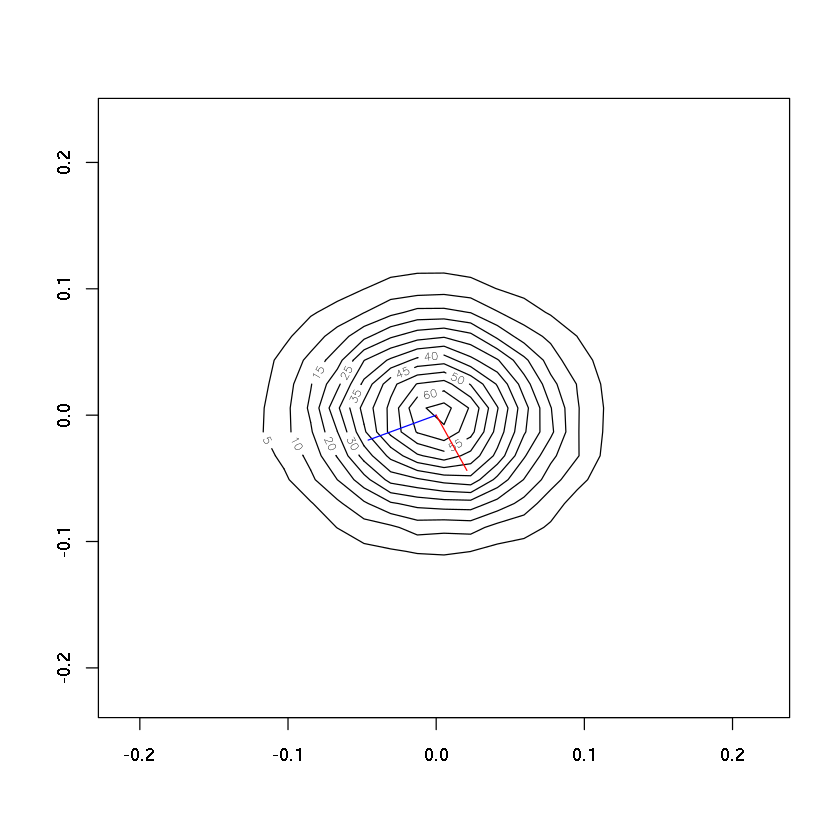

In [35]:
contour(kde2d(diffs[,1],diffs[,2]))
lines(c(0,dm_axes[1,1]), c(0,dm_axes[1,2]),type='l',col='blue')
lines(c(0,dm_axes[2,1]), c(0,dm_axes[2,2]),type='l',col='red')

In [40]:
dtheta = atan2(deig$vectors[1,2],deig$vectors[1,1])
dtheta

[1] -2.717646